# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation
The data set contains total of 947 rows with 8 columns. There are 5 numeric columns and 3 category columns with 52 missing records among 4 of 5 numeric columns and 373 missing values in 'high_traffic column'. Instead of dropping the rows we decided to impute on the missing 52 records and convert the missing values in 'high_traffic'to 'Unknown'


- recipe Numeric, unique identifier of recipe.Same as the description. No cleaning is needed.
- calories Numeric, number of calories.Same as the description. Converted to Integer. Imputed missing values with mean values.
- carbohydrate Numeric, amount of carbohydrates in grams.Same as the description. Converted to Integer.Imputed missing values with mean values.
- sugar Numeric, amount of sugar in grams.Same as the description. Converted to Integer.Imputed missing values with mean values.
- protein Numeric, amount of protein in grams.Converted to IntegerImputed missing values with mean values.
- category Character, type of recipe. Recipes are listed in one of ten.possible groupings (Lunch/Snacks', 'Beverages', 'Potato','Vegetable', 'Meat', 'Chicken, 'Pork','Dessert', 'Breakfast', 'One Dish Meal').Same as the description. Grouped 'Chicken Breat' to 'Chicken'                  
- servings Numeric, number of servings for the recipe..Same as the description. strip the strings.
- high_traffic Character, if the traffic to the site was high when this recipe was shown, this is marked with “High”. Same as the description.Replace the missing with 'Unknown' category


In [1]:
# import the relevant the liabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read the csv file
df = pd.read_csv('recipe_site_traffic_2212.csv',na_values=['n/a',' ','','missing','N/A','NA'])

# make copy the data frame
df_org = df.copy()

# explore the data set 
df.head()

## Function for printing no of unique if not object and return unique values if object
def unique_values(df):
    # loop through the columns in the df
    for col in df.columns:
        # print unique values if object
        if df[col].dtype == 'object':
            print(f'Category col--{col} : {df[col].unique()}')
        else:
            print(f'Numeric col --{col}: {df[col].nunique()}')
    return

unique_values(df)


Numeric col --recipe: 947
Numeric col --calories: 891
Numeric col --carbohydrate: 835
Numeric col --sugar: 666
Numeric col --protein: 772
Category col--category : ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
Category col--servings : ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
Category col--high_traffic : ['High' nan]


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [3]:
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [4]:
# Convert the calories, carbonhydrate, sugar, protein to Numeric -Integer to be same as example shown on website (Optional changes to Integer from float doesnt affect the way model performs)
food_info =['calories','carbohydrate','sugar','protein']

# loop the colums
for i in food_info:
    df_org[i] = pd.to_numeric(df_org[i], errors='coerce')
    df_org[i]=df_org[i].round()
    df_org[i] = df_org[i].astype('Int64')



# Original list of category 
category_list=['Lunch/Snacks','Beverages','Potato','Vegetable','Meat','Chicken','Pork','Dessert','Breakfast','One Dish Meal']
category_set = set(category_list)

# list of unique values in data frame
org_df = set(df_org['category'].unique().tolist())

# see which cateogry is expcetion
org_df - category_set

# make correct category for chicken breast and modified and update in data frame
df_org.loc[df_org['category']=='Chicken Breast','category'] = 'Chicken'

# Check to assert if it throws error
assert df_org['category'].nunique() == len(category_list)



# format the string of the serviings column
df_org['servings'] = df_org['servings'].apply(lambda x: x.replace('as a snack','').rstrip())


# Convert the misisng values to 'Unknow in traffic column'
df_org['high_traffic'] = df_org['high_traffic'].apply(lambda x :'High' if x =='High' else 'Unknown')



# Explodatory Data Analysis
After exploring the data types are suitable and observed the missing records we implemented below steps before modeling:
- I convert the missng values in target column ('high_traffic') as 'Unknown' category
- I decided to keep the missing 52 records in numeric columns as dropping then and using them give a better accuracy score which is our desired objective metric.

As this is classification problem, instead of seeing the distribution of target column we print out table to see whether there is class imbalance or not. The ratio is High:Unknown = 61 : 39 , where there is no indication of class imbalance.

## Class balance for the Target Column

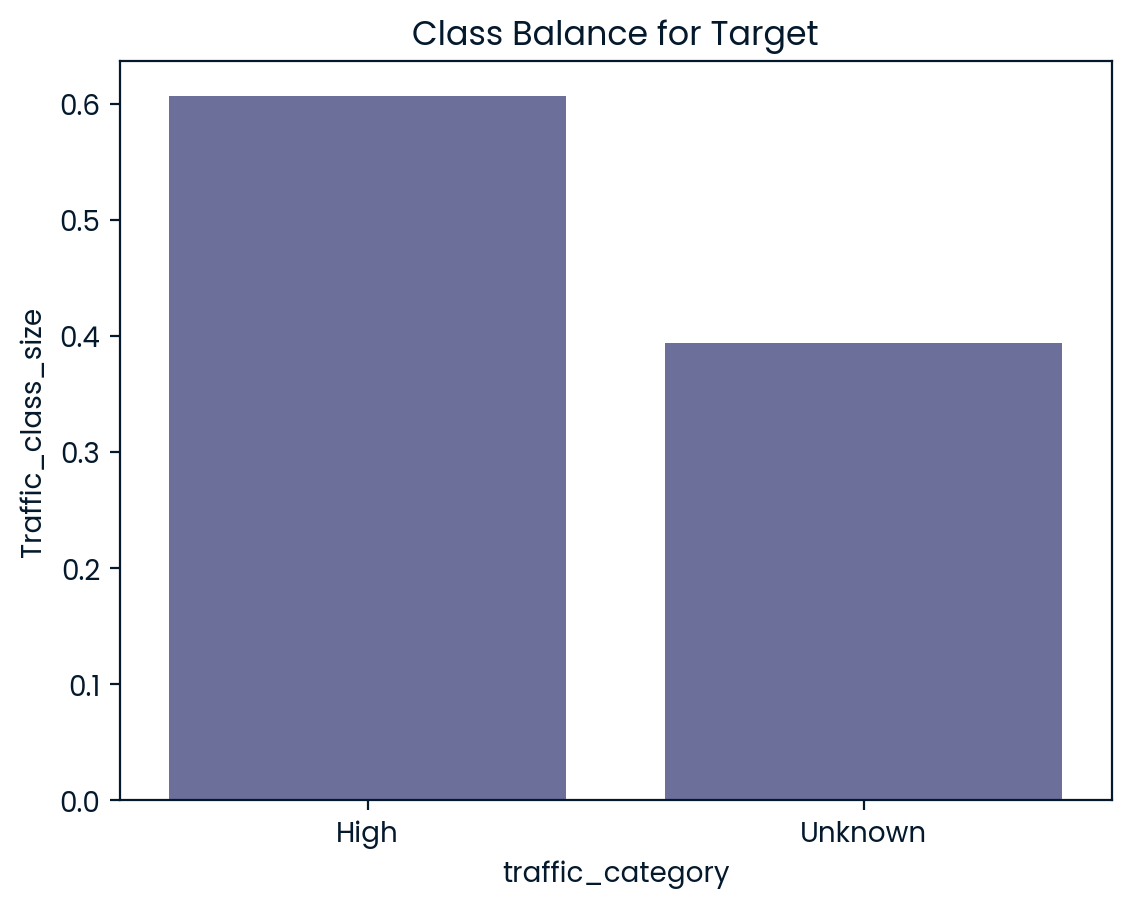

In [5]:
# see the category proportion
target_class_group=df_org['high_traffic'].value_counts(normalize=True).reset_index()

# rename the columns
target_class_group.columns = ['traffic_category','Traffic_class_size']

# Plot the class distribution
sns.barplot(data=target_class_group,x='traffic_category',y='Traffic_class_size')
plt.title('Class Balance for Target')
plt.show()

## Count of recipe with corresponding Traffic

I notice that the highest recipes can fetch up frequency nearly up to 30 website visit from multiple website surfers, whereas the count of unpopular recipe with Unknown attracts frequency up to more than 20 which may indicates some recipe not being labeled correctly or data catpure by the website/system correctly.

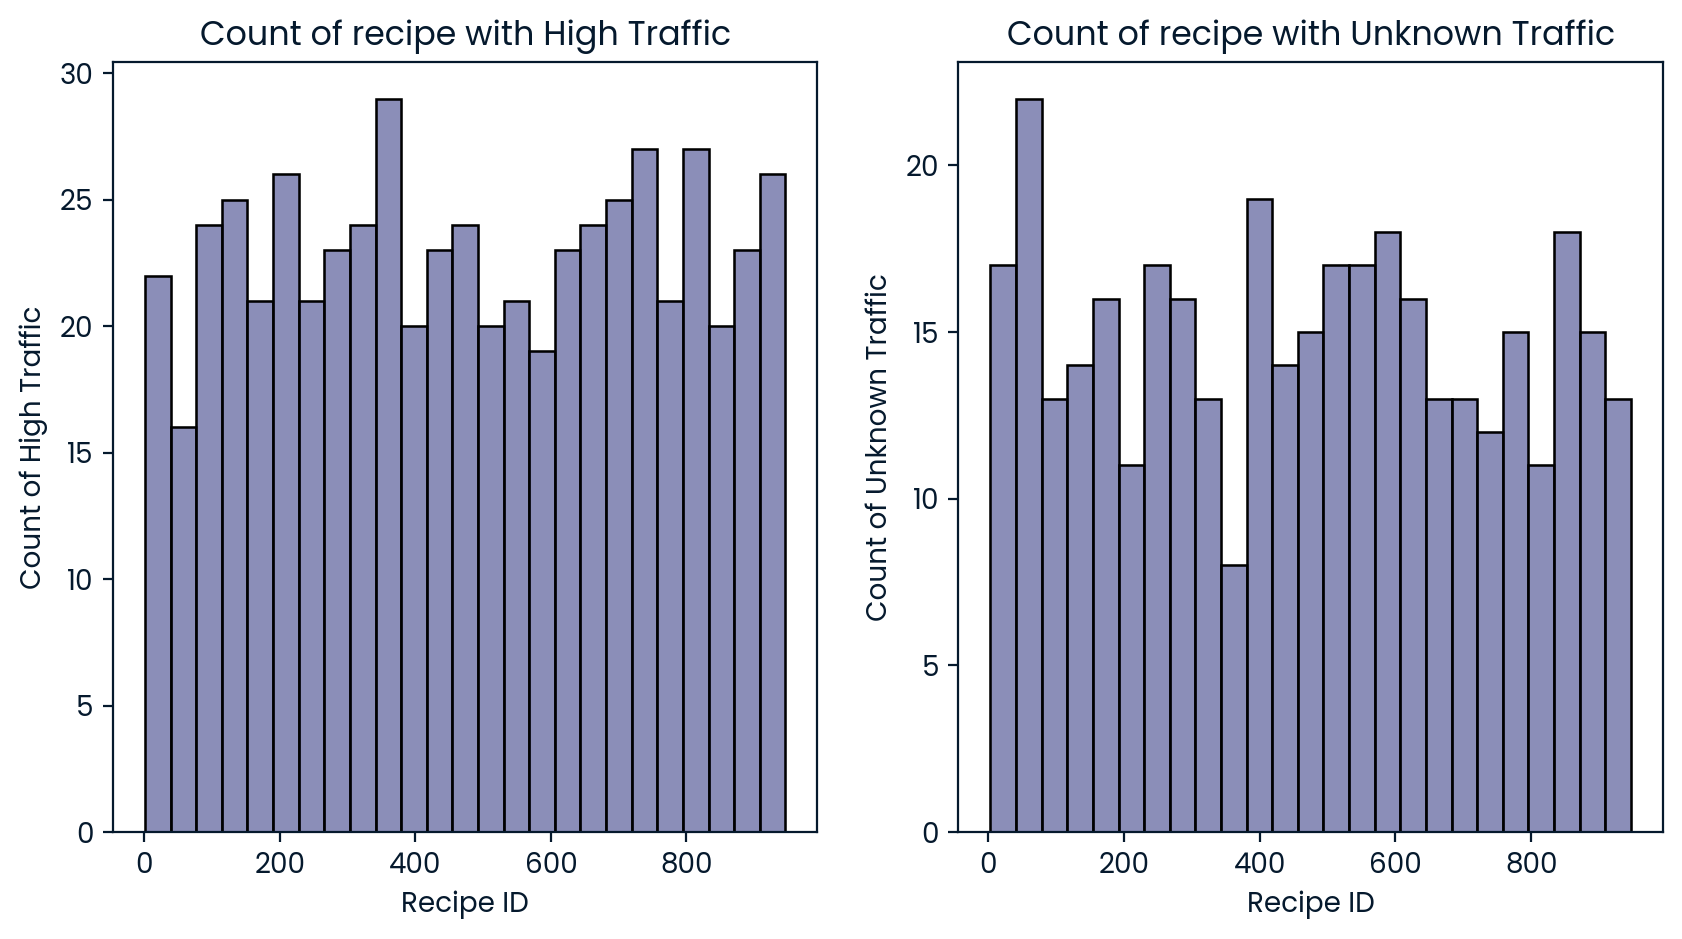

In [6]:

traffic_type =['High','Unknown']

fig,axes = plt.subplots(1,2,figsize=(10,5))

for i,traffic in enumerate(traffic_type):
    ax=axes[i]
    sns.histplot(data=df_org,x=df_org[df_org['high_traffic']==traffic]['recipe'],bins=25,ax=ax)
    ax.set_title(f'Count of recipe with {traffic} Traffic')
    ax.set_xlabel('Recipe ID')
    ax.set_ylabel(f'Count of {traffic} Traffic')

plt.show()


## Plotting distribution of the missing values in features columns to asset the type of missing

The distribution for each feature is similar for both missing and present values. SO this is Missing Completely At Random which is due to random chance not due to influence so we dont need to modify or find the reason for the missing unlike MAR.

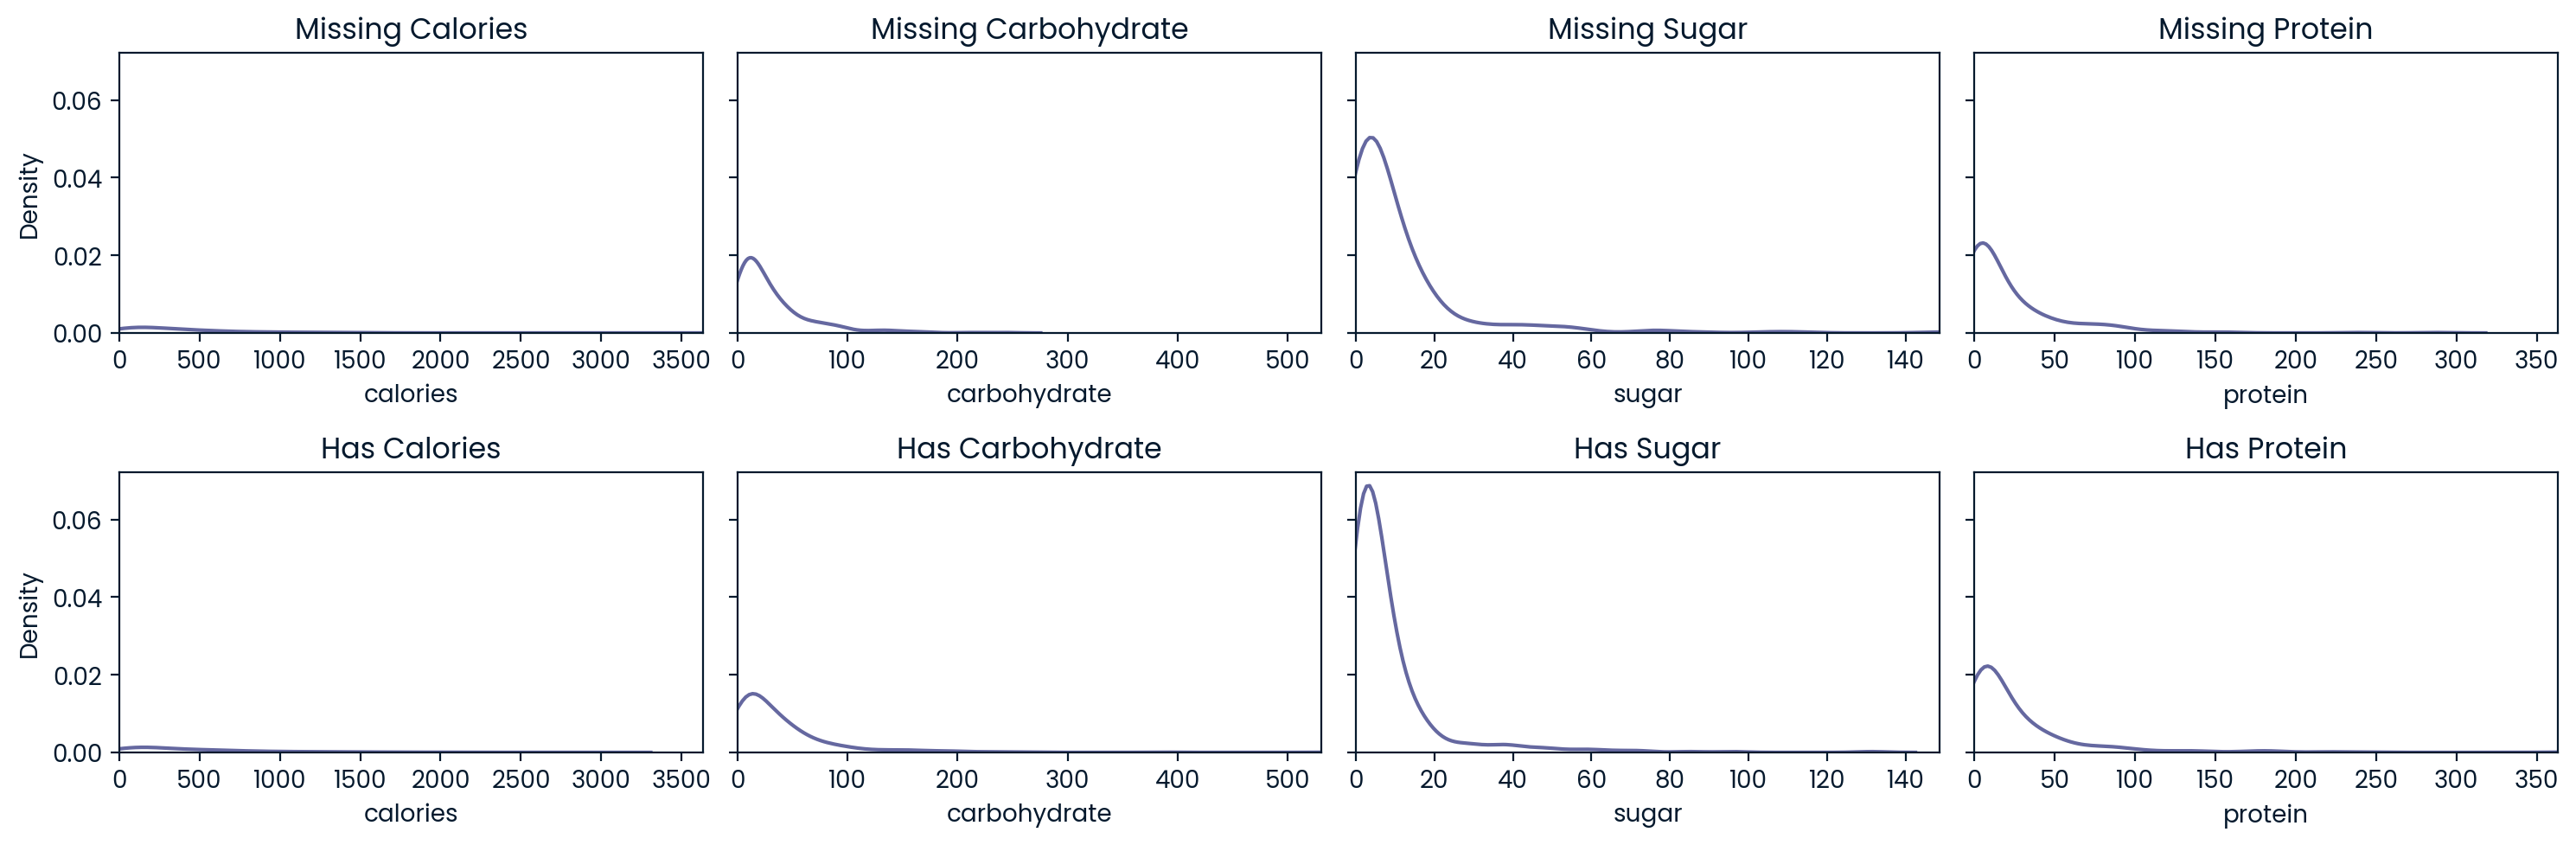

In [7]:
# Plotting the KDE plot to see what the missing type is  (MCAR, MNAR,MAR)

missing_target = df[df['high_traffic'].isnull()]
has_target = df[df['high_traffic'].notnull()]

features = ['calories','carbohydrate','sugar','protein']

#set up canvase
fig, axes = plt.subplots(2, 4, figsize=(15, 5), sharey=True)

# set up the x-axis range
xlims = {'calories':(0,df['calories'].max()), 'carbohydrate':(0,df['carbohydrate'].max()),'sugar':(0,df['sugar'].max()),'protein':(0,df['protein'].max())}

##loop and compare the distribution (we use the df which has no modiifed columns and rows)

# loop for the missing values
for i, col in enumerate(features):
    ax = axes[0, i]
    sns.kdeplot(missing_target[col], label='Missing Target', ax=ax)
    ax.set_xlim(xlims[col])  # Fix: Use xlims[col] to get the tuple for the specific column
    ax.set_title(f'Missing {col.capitalize()}')
    ax.set_xlabel(col)

# loop for the present values
for i, col in enumerate(features):
    ax = axes[1, i]
    sns.kdeplot(has_target[col], label='Has Target', ax=ax)
    ax.set_xlim(xlims[col])  # Fix: Use xlims[col] to get the tuple for the specific column
    ax.set_title(f'Has {col.capitalize()}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

## Numeric Columns

From the heatmap we notice that calories and protein pair has recognisable correlation, this is consider later onward in feature selection for the ML model where we exclude the features that have low correlation with no impact on other numeric varaible. Assumption here is that when features have low correlation between among themseleves it would be doubtful to have significant impact on the ML model.

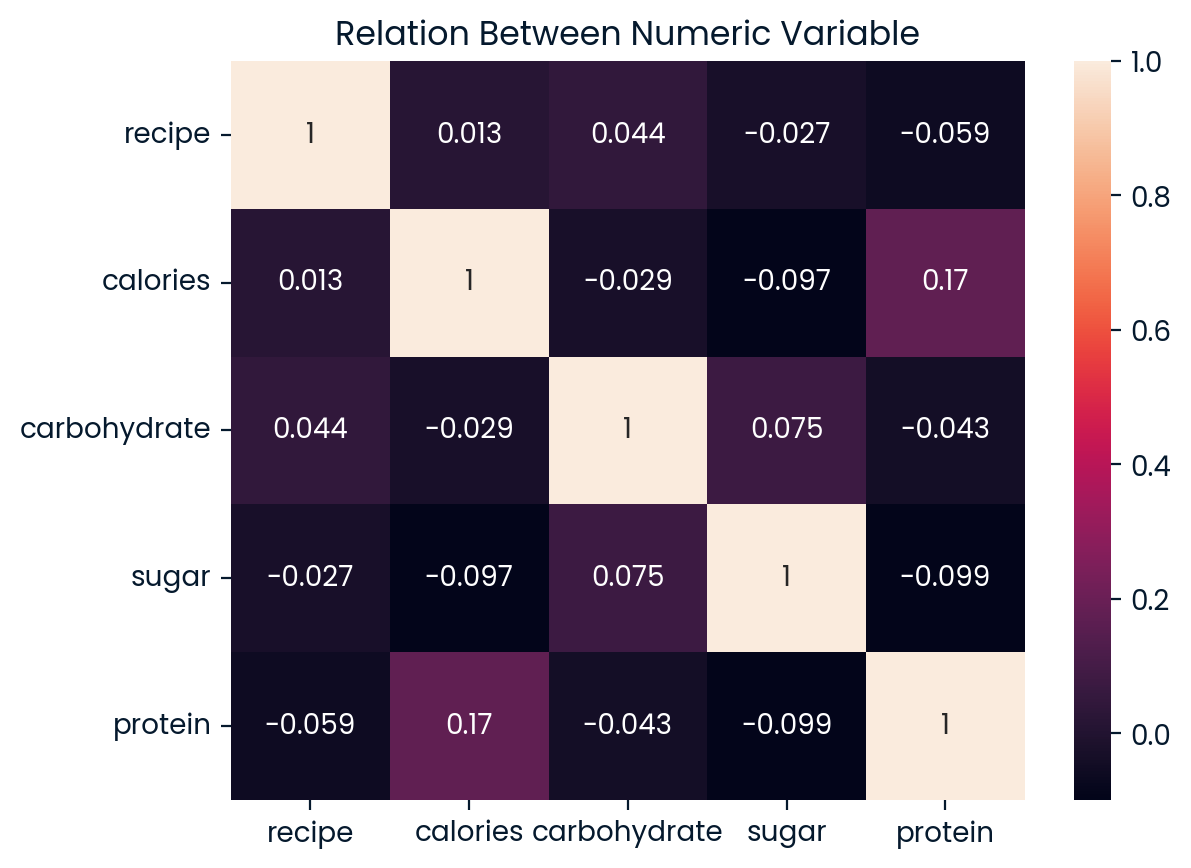

In [8]:
## Explore the correlation between the numeric columns

# select the numeric columns
num_features =['recipe','calories','carbohydrate','sugar','protein']

#plot heat map
sns.heatmap(df_org[num_features].corr(),annot=True).set(title='Relation Between Numeric Variable')
plt.show()

## Variation of the Numeric columns in regard to target category
All of these features have high variation in regard to the target cateogry, this has assumption that these visualized numeric faetures would have small impact on the target column or for some model would represent as noise that would reduce the accuracy score.

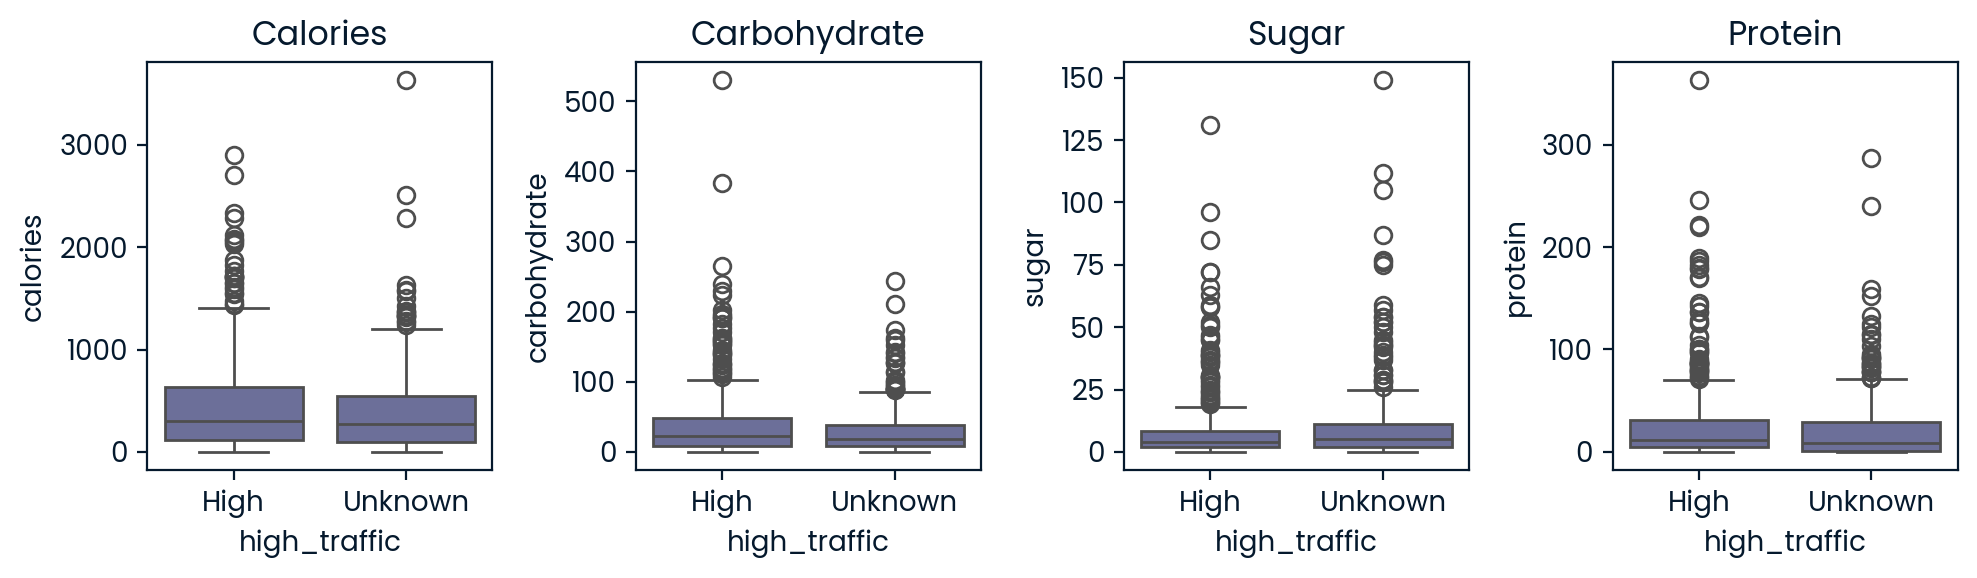

In [9]:
# box plot 
features = ['calories','carbohydrate','sugar','protein']

# set up empty canvas
fig,axes = plt.subplots(1,4,figsize=(10,3))

# loop box plot for each numeric features
for i,col in enumerate(features):
    ax=axes[i]
    sns.boxplot(x='high_traffic',y=col,ax=ax,data=df_org)
    ax.set_title(col.capitalize())

plt.tight_layout()
plt.show()

## Cateogrical Feature - ('Category','servings')

For category pork, potatop and vegetables has highest count of traffic meaning any recipe that contains these ingredient attract high traffics. For the beverage Unknown traffic is very high, it is worth noting to investigate if this mean low traffic or website failed to capture the acutal information as it is only ingredient that is essential in the meals which could be a factor in attracting high traffic to the website.

It is also noted that 4 servings attract the most traffic out of all the servings, indicating that the traffic derived from the family-oriented demographic which could be useful in marketing the right audience for the sales & marketing team.

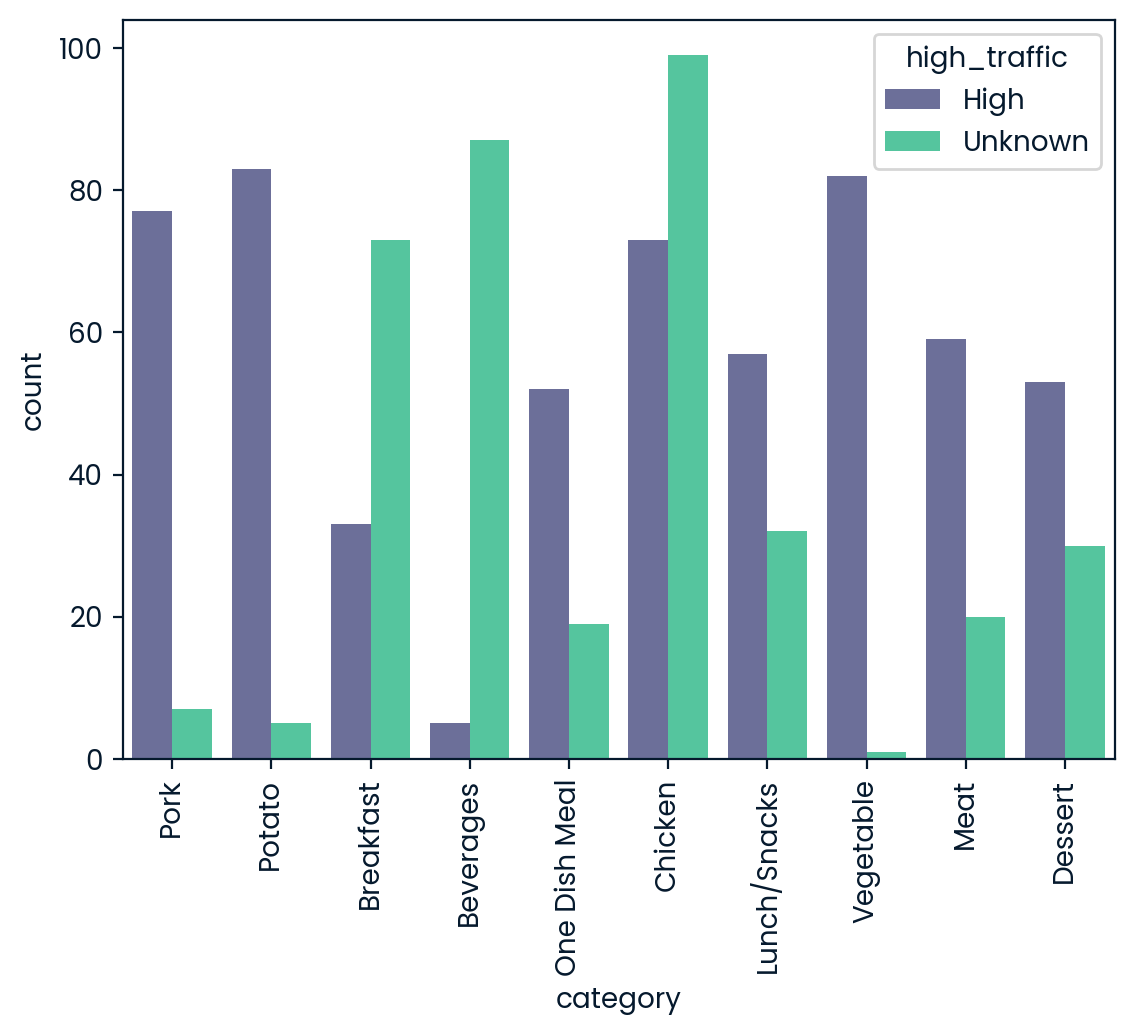

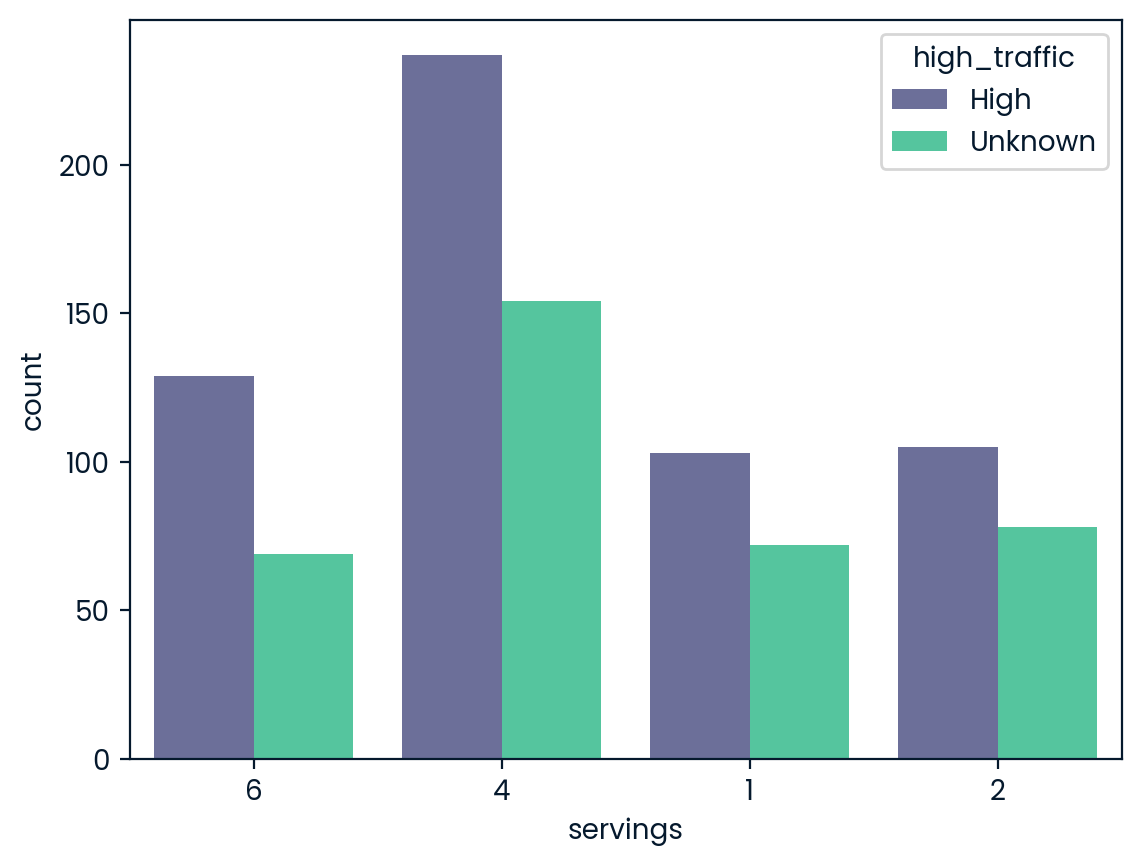

In [10]:
## For categorical features

sns.countplot(data=df_org,x='category',hue='high_traffic')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df_org,x='servings',hue='high_traffic')
plt.show()

# Model Fitting and Evaluation

Since it is a classification problem we decided to use the base models KNeighbors, Logistic Regression, Decision Tree Classifier and Voting Major Classifier to hit the desired accuracy of the 80%.

Metric used to measure
- accuracy
- recall (Assumption is that opportunity cost far exceed cost of showing unpopular recipe )
- generalization gap (To see if the model works well on the unseen data)

Evaluation steps
- observed the raw/base model accuracy score and recall
- Grid search CV for optimal paramter
- reobserved the accuracy score and recall
- Select the model with the greatest accuracy score and plot the learning cruve and calculate the generalization error
- When selected model has low validation score in learning curve and high generalization error move to second greatest accuracy score
- repeat the learning curve and generalization error
- finalized by checking those score and see if the model work well on the unseen data

 Troubleshoot step
 - diagnose why we are not able to get the desired target of 80%.
 - consider the metric that would have significant impact on the business (recall- Predicted as 'Unknown' but actually 'High' this represent the opportunity cost, although we lack info regarding this)

## Preparation for the Modeling

1. Separate the numerical and category columns and stored in varaibles which will be used in the data pipe line
2. I used data pipeline to prevent data leakage which would have impact on our metrics
3. Encode the category data and imputed the numerical missing data with mean values and scaled the data for standardization, all done in pipelinet
4. create separate pipeline for each model
5. fit the raw/base pipleline model to the 

### Importing libraies and preprocess the data in the _pipelines_

In [11]:
## Reperforming with data pipeline for clearer code ##

# import relevant features
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# split features by type
num_features =['recipe','calories','carbohydrate','sugar','protein']
cat_features = ['category','servings']

# copy the clean data
df_1= df_org.copy()

# Features and target 
X = df_1[num_features + cat_features]
y = df_1['high_traffic']

# train, test, split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

# Preprocessing pipeline
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(handle_unknown='ignore'))])

preprocessor =ColumnTransformer([('num',num_pipeline, num_features),('cat',cat_pipeline,cat_features)])

### KNeighbours Classifier

KNeighbor classifier with tuned hyperparameter and selected features has accuracy score of 0.721 and recall of 0.81

### Train with the base model for KNeighbor

In [12]:
# Connect pipeline to the model for KNeighborsClassifier
pipe_knn = Pipeline([('prep', preprocessor), ('model', KNeighborsClassifier())])

pipe_knn.fit(X_train,y_train)
print(f'KNN training score before tuned:{pipe_knn.score(X_train,y_train)}')
print(f'KNN testing score before tuned:{pipe_knn.score(X_test,y_test)}','\n')

KNN training score before tuned:0.8124174372523117
KNN testing score before tuned:0.7 



### Grid Search KNeighbor

Fitting 5 folds for each of 17 candidates, totalling 85 fits
KNN training scored after tuned : 0.7344782034346103
KNN testing scored after tuned : 0.7344782034346103


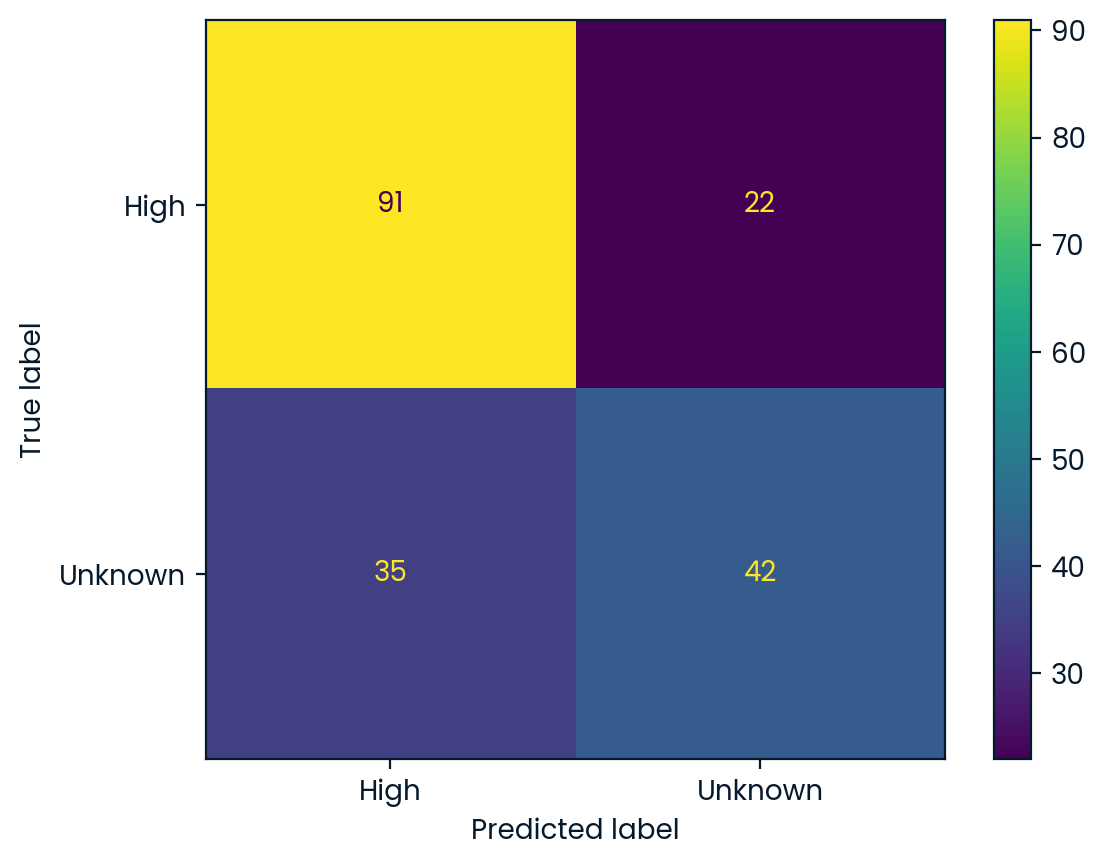

              precision    recall  f1-score   support

        High       0.72      0.81      0.76       113
     Unknown       0.66      0.55      0.60        77

    accuracy                           0.70       190
   macro avg       0.69      0.68      0.68       190
weighted avg       0.70      0.70      0.69       190



In [13]:
# Set param grid
param_grid = {'model__n_neighbors': [1,2,3,4, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 30, 35, 40]}

# Grid Search for optimal n_neighbors
knn_model = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit the model
knn_model.fit(X_train, y_train)
print(f'KNN training scored after tuned : {knn_model.score(X_train,y_train)}')
print(f'KNN testing scored after tuned : {knn_model.score(X_train,y_train)}')

# predict
knn_y_pred = pipe_knn.predict(X_test) 

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,knn_y_pred)
plt.show()

# classification report
print(classification_report(y_test,knn_y_pred))

### KNeighbors Tuned model accuracy with the missing data removed

I noticed that even tho KNN model is tuned in above and this scenario, model with more data has different significant accuracy rate of nearly 5% which comes from the 5% of the total records in the data set. 
This evident that when model is given more data volume it would work toward the 80% accuracy.

In [14]:
# copy the data frame
df_2 = df_org.copy()

# remove the missing values
df_2 = df_2.dropna(axis=0)

print(f'Number of records: {len(df_2)}')
# Features and target 
X = df_1[num_features + cat_features]
y = df_1['high_traffic']

# train, test, split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

# Preprocessing pipeline
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(handle_unknown='ignore'))])

preprocessor =ColumnTransformer([('num',num_pipeline, num_features),('cat',cat_pipeline,cat_features)])

# Connect pipeline to KNN using updated feature
pipe_knn_top = Pipeline([('prep',preprocessor),('model2',KNeighborsClassifier())])

# Grid search the optiaml parameter
param_grid = {'model2__n_neighbors': [1,2,3,4, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 30, 35, 40]}
knn_top_model_2 = GridSearchCV(pipe_knn_top,param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

# fit model
knn_top_model_2.fit(X_train,y_train)

# get accuracy score
print(f'The accuracy score of features selected is: {accuracy_score(y_test,knn_top_model_2.predict(X_test))}')



Number of records: 895
Fitting 5 folds for each of 17 candidates, totalling 85 fits
The accuracy score of features selected is: 0.7052631578947368


### KNeighbor after the feature selection
Initially this model has the highest accuracy rate so I performed learning curve and generalization error to see if it works on the unseen data. We notice it has high variance so we reduce the features as to see if the model would works better on unseen data when noise is remove.

Fitting 5 folds for each of 17 candidates, totalling 85 fits
The accuracy score of features selected is: 0.7210526315789474


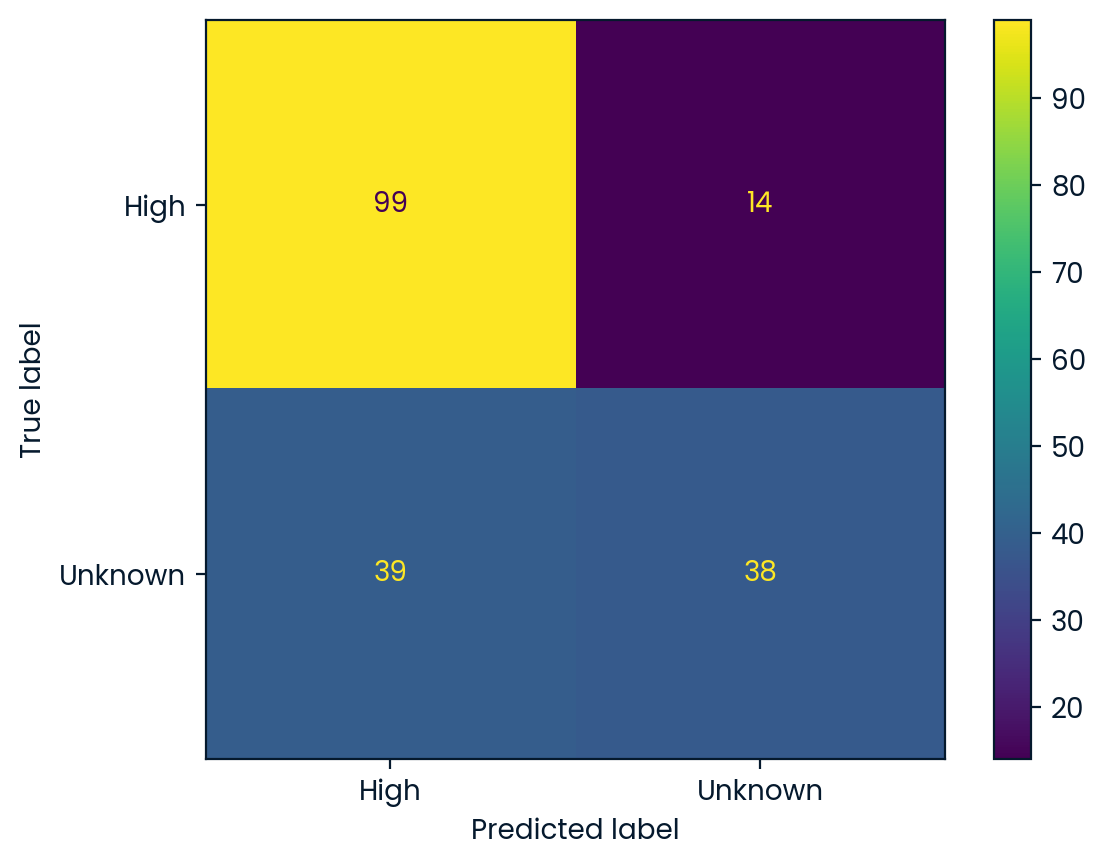

              precision    recall  f1-score   support

        High       0.72      0.88      0.79       113
     Unknown       0.73      0.49      0.59        77

    accuracy                           0.72       190
   macro avg       0.72      0.68      0.69       190
weighted avg       0.72      0.72      0.71       190



In [15]:
# #update numerical and categorical column
num_top = ['recipe','calories','protein']

# rebuild the preprocessor
preprocessor_top = ColumnTransformer([('num',num_pipeline, num_top),('cat',cat_pipeline,cat_features)])

# Connect pipeline to KNN using updated feature
pipe_knn_top = Pipeline([('prep',preprocessor_top),('model1',KNeighborsClassifier())])#reducing the features affect the optimal hyperparameter so use the base model again

# Grid search the optiaml parameter
param_grid = {'model1__n_neighbors': [1,2,3,4, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 30, 35, 40]}
knn_top_model = GridSearchCV(pipe_knn_top,param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

# fit model
knn_top_model.fit(X_train,y_train)

# get accuracy score
print(f'The accuracy score of features selected is: {accuracy_score(y_test,knn_top_model.predict(X_test))}')

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,knn_top_model.predict(X_test))
plt.show()

# classification report
print(classification_report(y_test,knn_top_model.predict(X_test)))

### Logistic Regression
Logistic Regression has accuracy score of training is 0.772 and testing is 0.778 indicating it performs well on the unseen data and recall rate of 0.86.

Lrg training score : 0.76221928665786
Lrg testing score : 0.7526315789473684


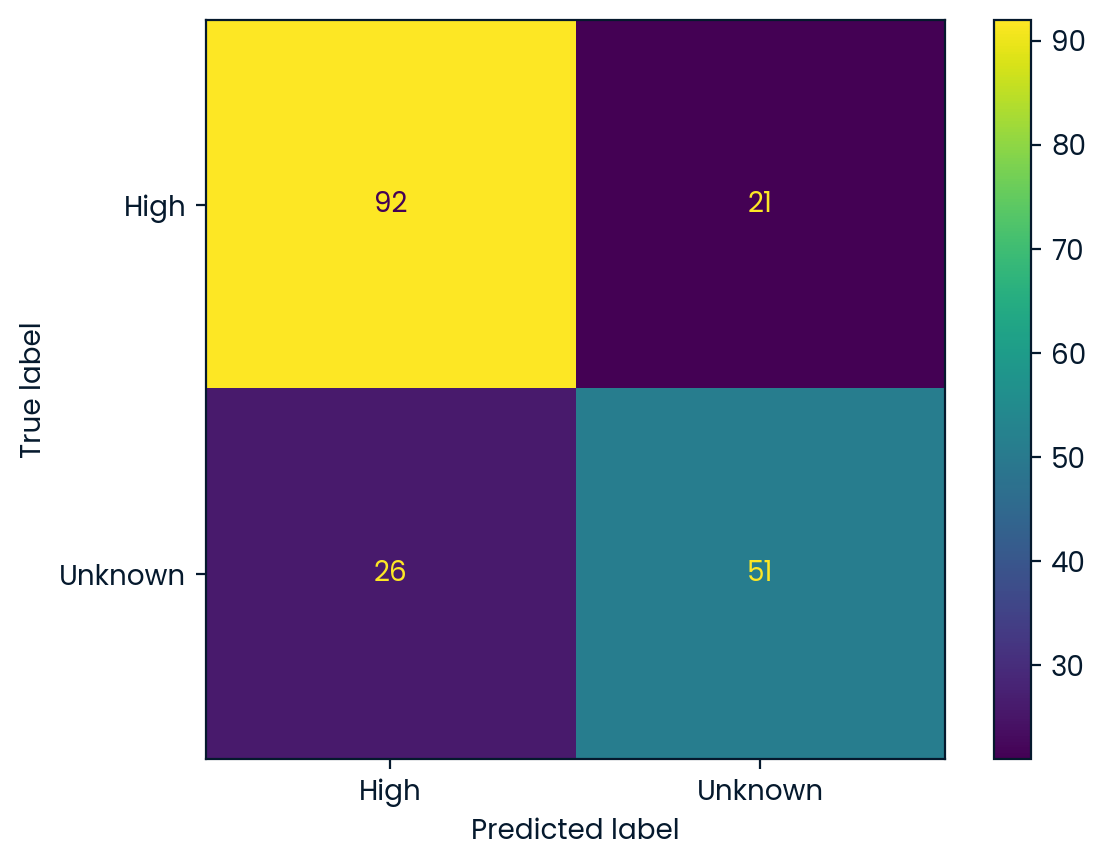

              precision    recall  f1-score   support

        High       0.78      0.81      0.80       113
     Unknown       0.71      0.66      0.68        77

    accuracy                           0.75       190
   macro avg       0.74      0.74      0.74       190
weighted avg       0.75      0.75      0.75       190



In [16]:
# Connect pipeline to the model for Logistic Regression
pipe_lrg = Pipeline([('prep', preprocessor), ('model', LogisticRegression())])

# fit the data to model
lrg_model = pipe_lrg.fit(X_train, y_train)

print(f'Lrg training score : {pipe_lrg.score(X_train, y_train)}')
print(f'Lrg testing score : {pipe_lrg.score(X_test, y_test)}')

# predict
lrg_y_pred = lrg_model.predict(X_test)

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, lrg_y_pred)
plt.show()

# classification report
print(classification_report(y_test, lrg_y_pred))


### Feature importance in Logistic Regression

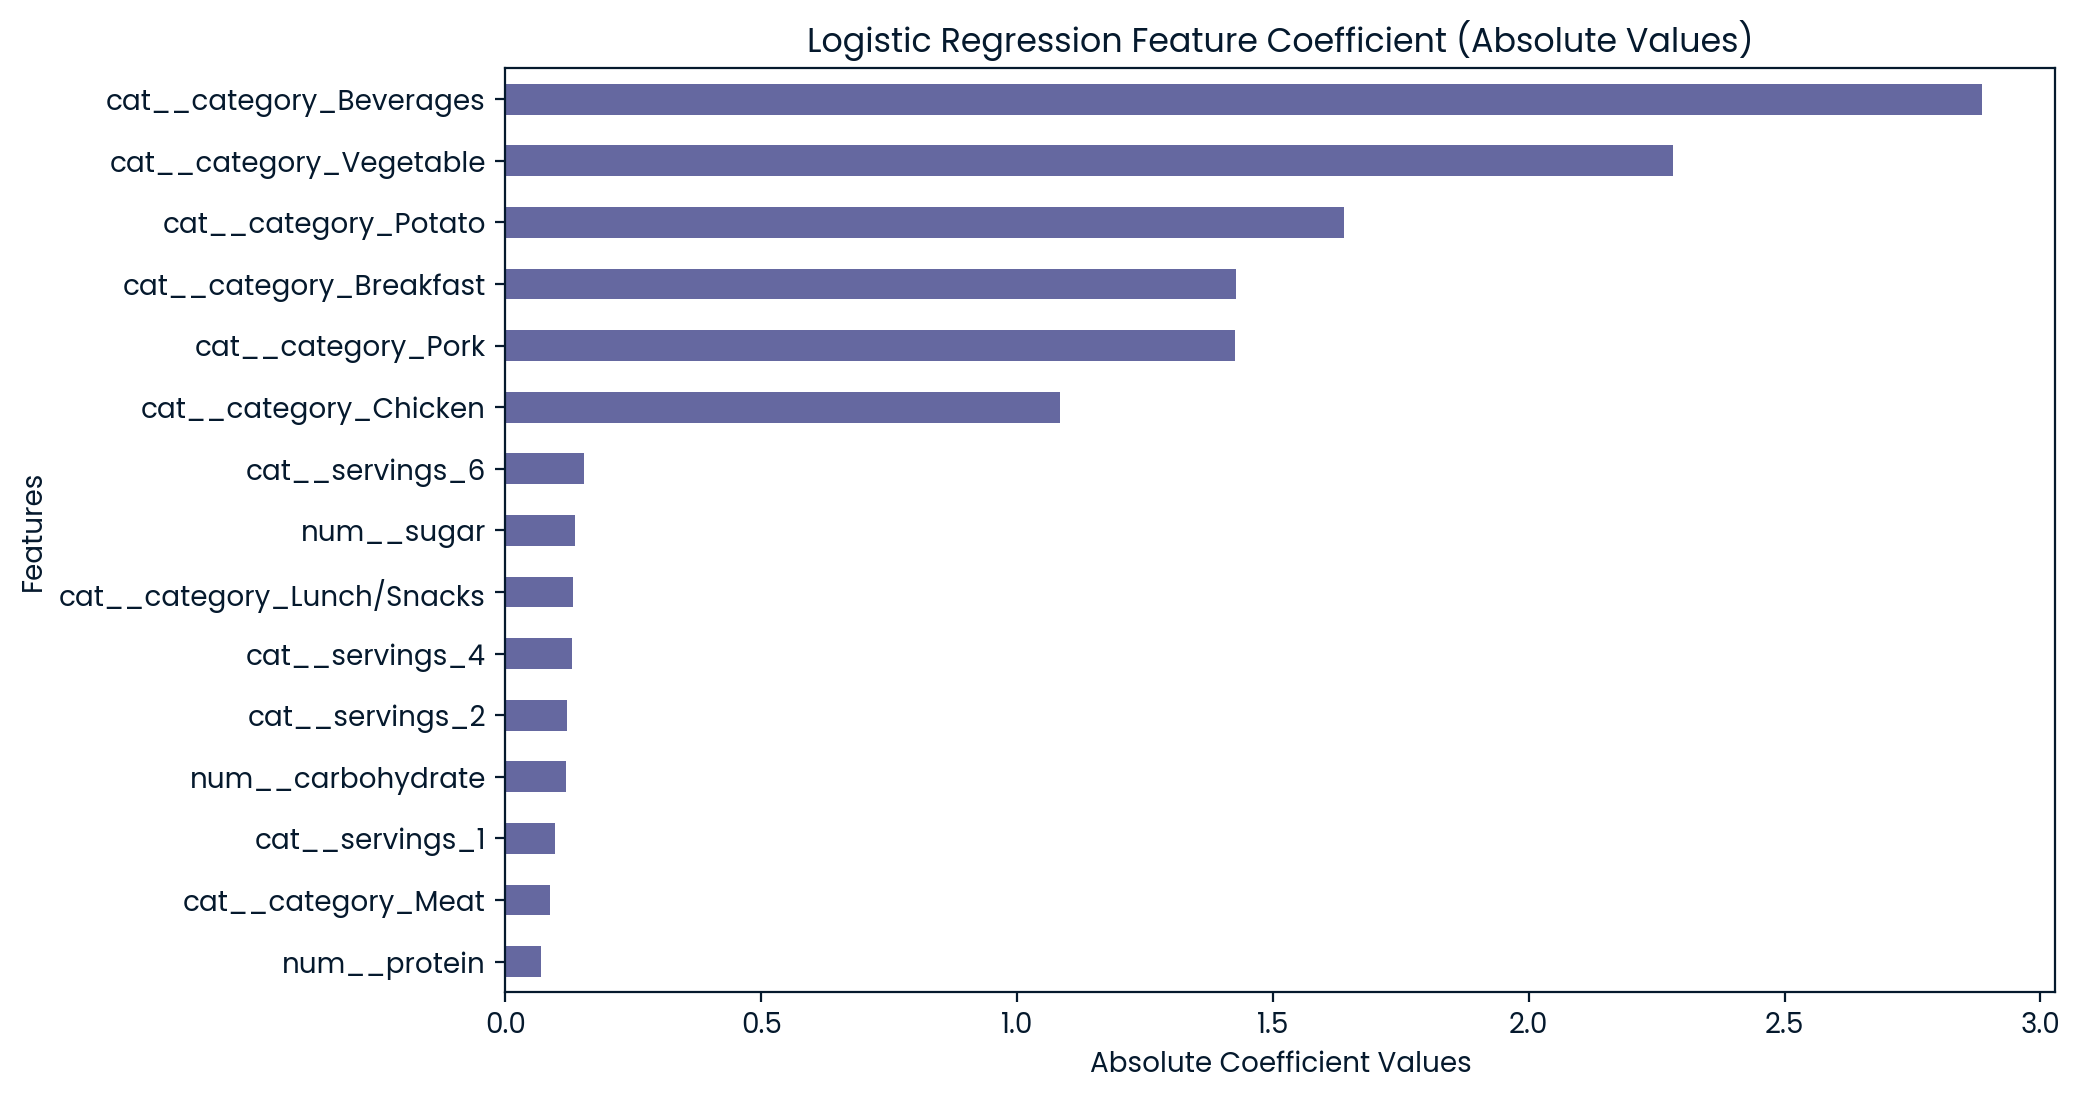

In [17]:
# Find the importance of features using the coefficient
lr_coefficient = lrg_model.named_steps['model'].coef_[0]

# Get feature names after preprocessing
feature_names = pipe_lrg.named_steps['prep'].get_feature_names_out()

# convert to series for better sorting and plotting
feature_coef_series = pd.Series(lr_coefficient, index=feature_names)

# extract features above 0.05
top_features = feature_coef_series[np.abs(feature_coef_series) > 0.5].index.to_list()

# set up canvas and plot the data
plt.figure(figsize=(10, 6))

feature_coef_series.abs().nlargest(15).plot(kind='barh')  # we include abs as some relations are inverse or negative
plt.title('Logistic Regression Feature Coefficient (Absolute Values)')
plt.xlabel('Absolute Coefficient Values')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

### Decision Tree Classifier
Decision Tree Classifer tuned model has accuracy of 0.731 and recall rate of 0.88.


### Train with Base model for the Decision Tree Classifier and Feature importance

- recipe has highest importance but this is just unique ID indication of overfitting (if this were text, suggest that users have baised search or there are letters and text that is searched highly than others)
- nurtional facts (calories, protein, sugar, carbohyrdate) holds importance in the decision tree classifier which is different from the logistic regression
- in category : beverage, chicken, breakfast have much more importance ad tree is also using specific nutritional values and the recipe identifier to make splits.


Decision Tree untuned training score 1.0
Decision Tree untuned test score 0.6631578947368421 



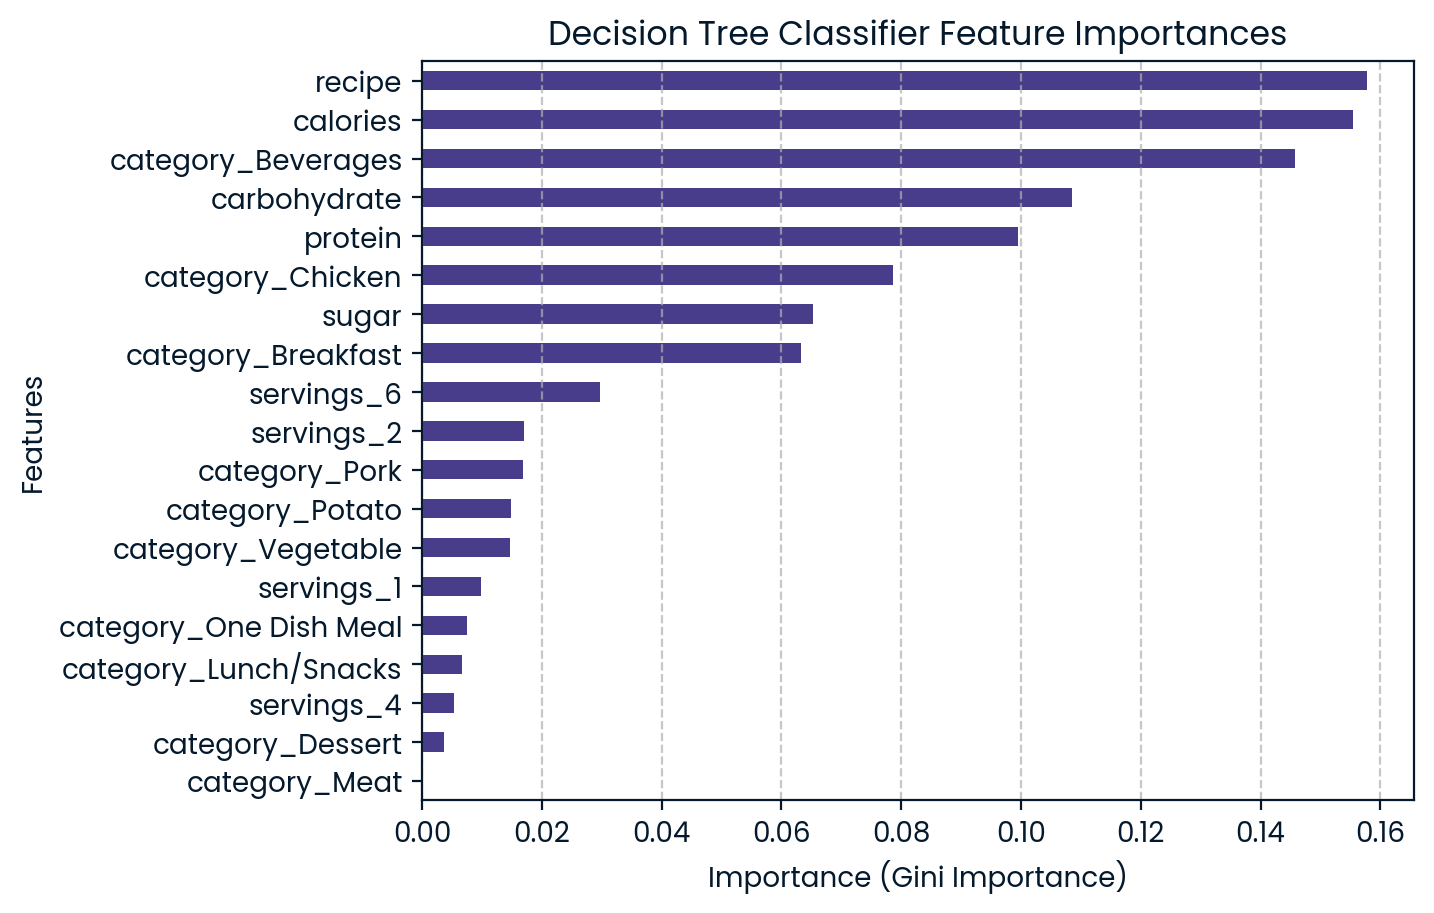

In [26]:
# Connect pipeline to the model for Decision Tree
pipe_dtc = Pipeline([('pipe', preprocessor), ('model', DecisionTreeClassifier(random_state=42))])

# fit to the raw model
base_dtc_model = pipe_dtc.fit(X_train, y_train)

print(f'Decision Tree untuned training score {pipe_dtc.score(X_train, y_train)}')
print(f'Decision Tree untuned test score {pipe_dtc.score(X_test, y_test)}','\n')

# Access the model from the pipeline using named_steps
dtc_model_pipeline = base_dtc_model.named_steps['model']

# Access the feature importance
dtc_feature_importance = dtc_model_pipeline.feature_importances_

# Access the preprocessor (cuz the arrays from the feature_importances are from prepocessed results)
fitted_processor = base_dtc_model.named_steps['pipe']

# convert numeric columns to list (no need as we store that in list already before creating X/feature)
num_features

# get encoded columns name
one_hot_encoded_names = fitted_processor.named_transformers_['cat'].get_feature_names_out(cat_features).tolist()

# combined all the processed feature names
all_processed_feature_names = scaled_feature_names+ one_hot_encoded_names

# create pandas series
feature_importance_series = pd.Series(dtc_feature_importance, index=all_processed_feature_names).sort_values(ascending=False)

feature_importance_series.plot(kind='barh', color='darkslateblue')
plt.title('Decision Tree Classifier Feature Importances')
plt.xlabel('Importance (Gini Importance)')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()

### Grid Search CV Decision Tree Classifier

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Tree tuned training score 0.7648612945838837
Decision Tree tuned test score 0.7578947368421053


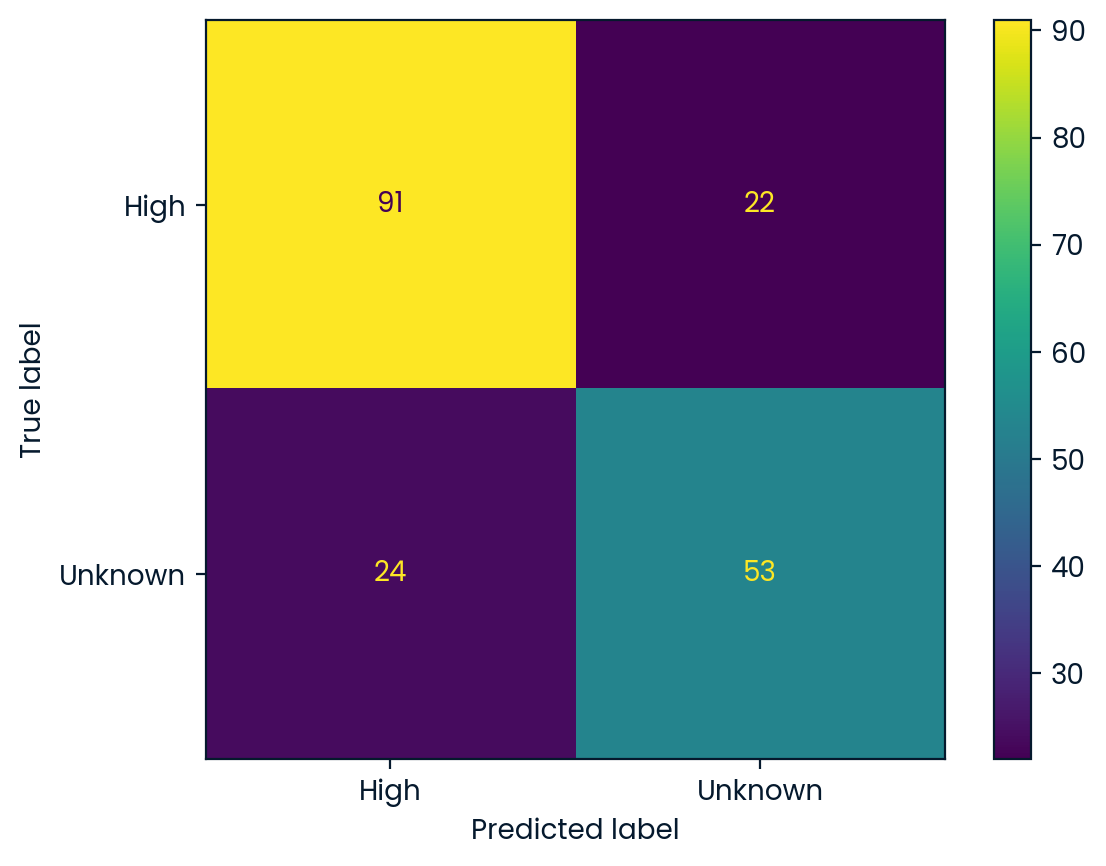

              precision    recall  f1-score   support

        High       0.79      0.81      0.80       113
     Unknown       0.71      0.69      0.70        77

    accuracy                           0.76       190
   macro avg       0.75      0.75      0.75       190
weighted avg       0.76      0.76      0.76       190

The accuracy score of tuned dtc model is : 0.7578947368421053


In [172]:
# set the parameters
param_grid = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini', 'entropy'] 
}

# grid search for optimal parameter
dtc_model = GridSearchCV(estimator=pipe_dtc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# fit the data to the model
dtc_model.fit(X_train, y_train)

# predict
dtc_y_pred = dtc_model.predict(X_test)

print(f'Decision Tree tuned training score {dtc_model.score(X_train, y_train)}')
print(f'Decision Tree tuned test score {accuracy_score(y_test, dtc_y_pred)}')

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, dtc_y_pred)
plt.show()

# classification report
print(classification_report(y_test, dtc_y_pred))

# accuracy score
print(f'The accuracy score of tuned dtc model is : {accuracy_score(y_test,dtc_y_pred)}')

### Voting Majoirty Classifier
Voting Classifier has 3 based model of KNeighbor, Logistic Regression and Decision Tree Classifier. It has accuracy of 0.773 and recall of 0.88.

The accuracy from the voting classifier is :0.7526315789473684


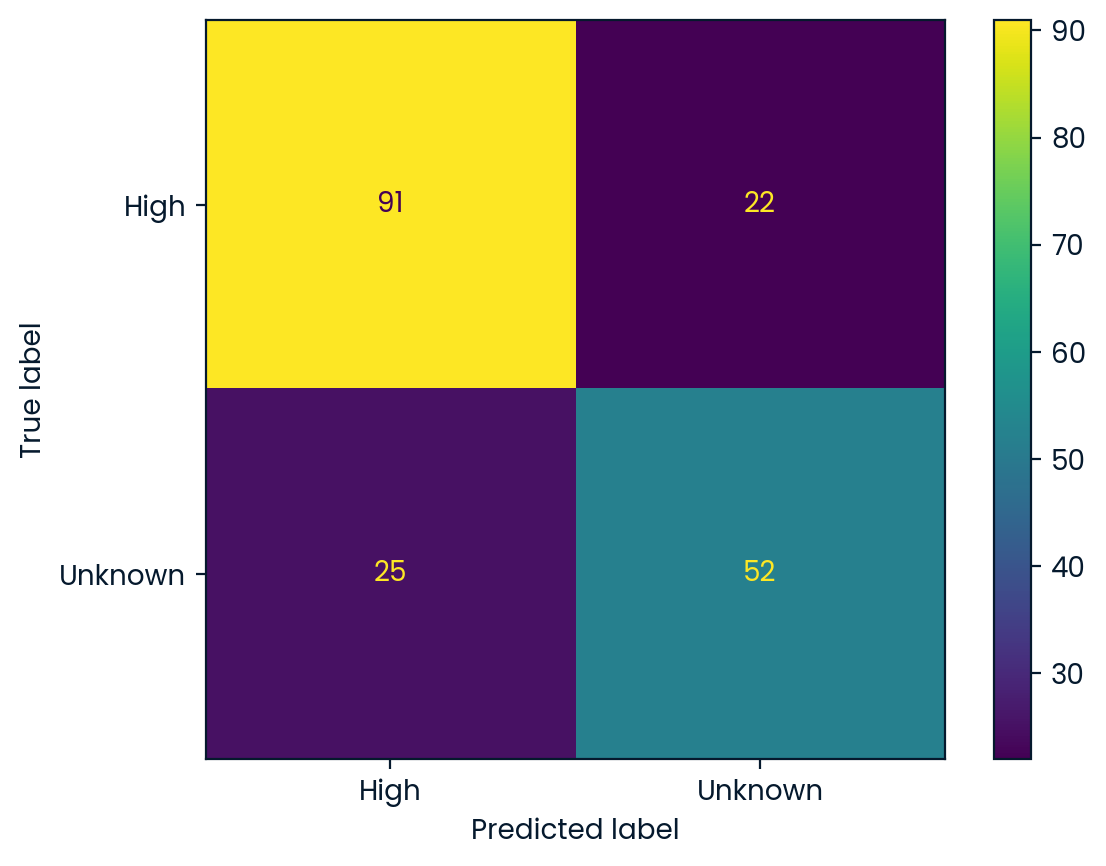

              precision    recall  f1-score   support

        High       0.78      0.81      0.79       113
     Unknown       0.70      0.68      0.69        77

    accuracy                           0.75       190
   macro avg       0.74      0.74      0.74       190
weighted avg       0.75      0.75      0.75       190



In [173]:
## Using Voting Mjority classifier

# import library
from sklearn.ensemble import VotingClassifier

# set up classifiers
classifiers = [('KNeighbor',knn_top_model.best_estimator_),('LogisticRegression',lrg_model),('DecisionTreeClassifier',dtc_model.best_estimator_)]

# Instantiate VotingClassifier
voting_clf = VotingClassifier(estimators=classifiers,voting='hard')

# fit the model
voting_clf.fit(X_train,y_train)

# predict 
voting_clf_y_pred=voting_clf.predict(X_test)

# print the accuracy score
print(f'The accuracy from the voting classifier is :{accuracy_score(y_test,voting_clf_y_pred)}')

# print the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,voting_clf_y_pred)
plt.show()

# print classification report
print(classification_report(y_test,voting_clf_y_pred))

## Comparison of models' performance

From comparison we can see that the Logistic Regression has accuracy that is similar to other models as well as reliable recall rate but KNN has highest recall rate. Logistc Regression is chosen due its insignificant generalization error which works well on unseen data compare to KNN and easier to implement and less complex than other remaining models.

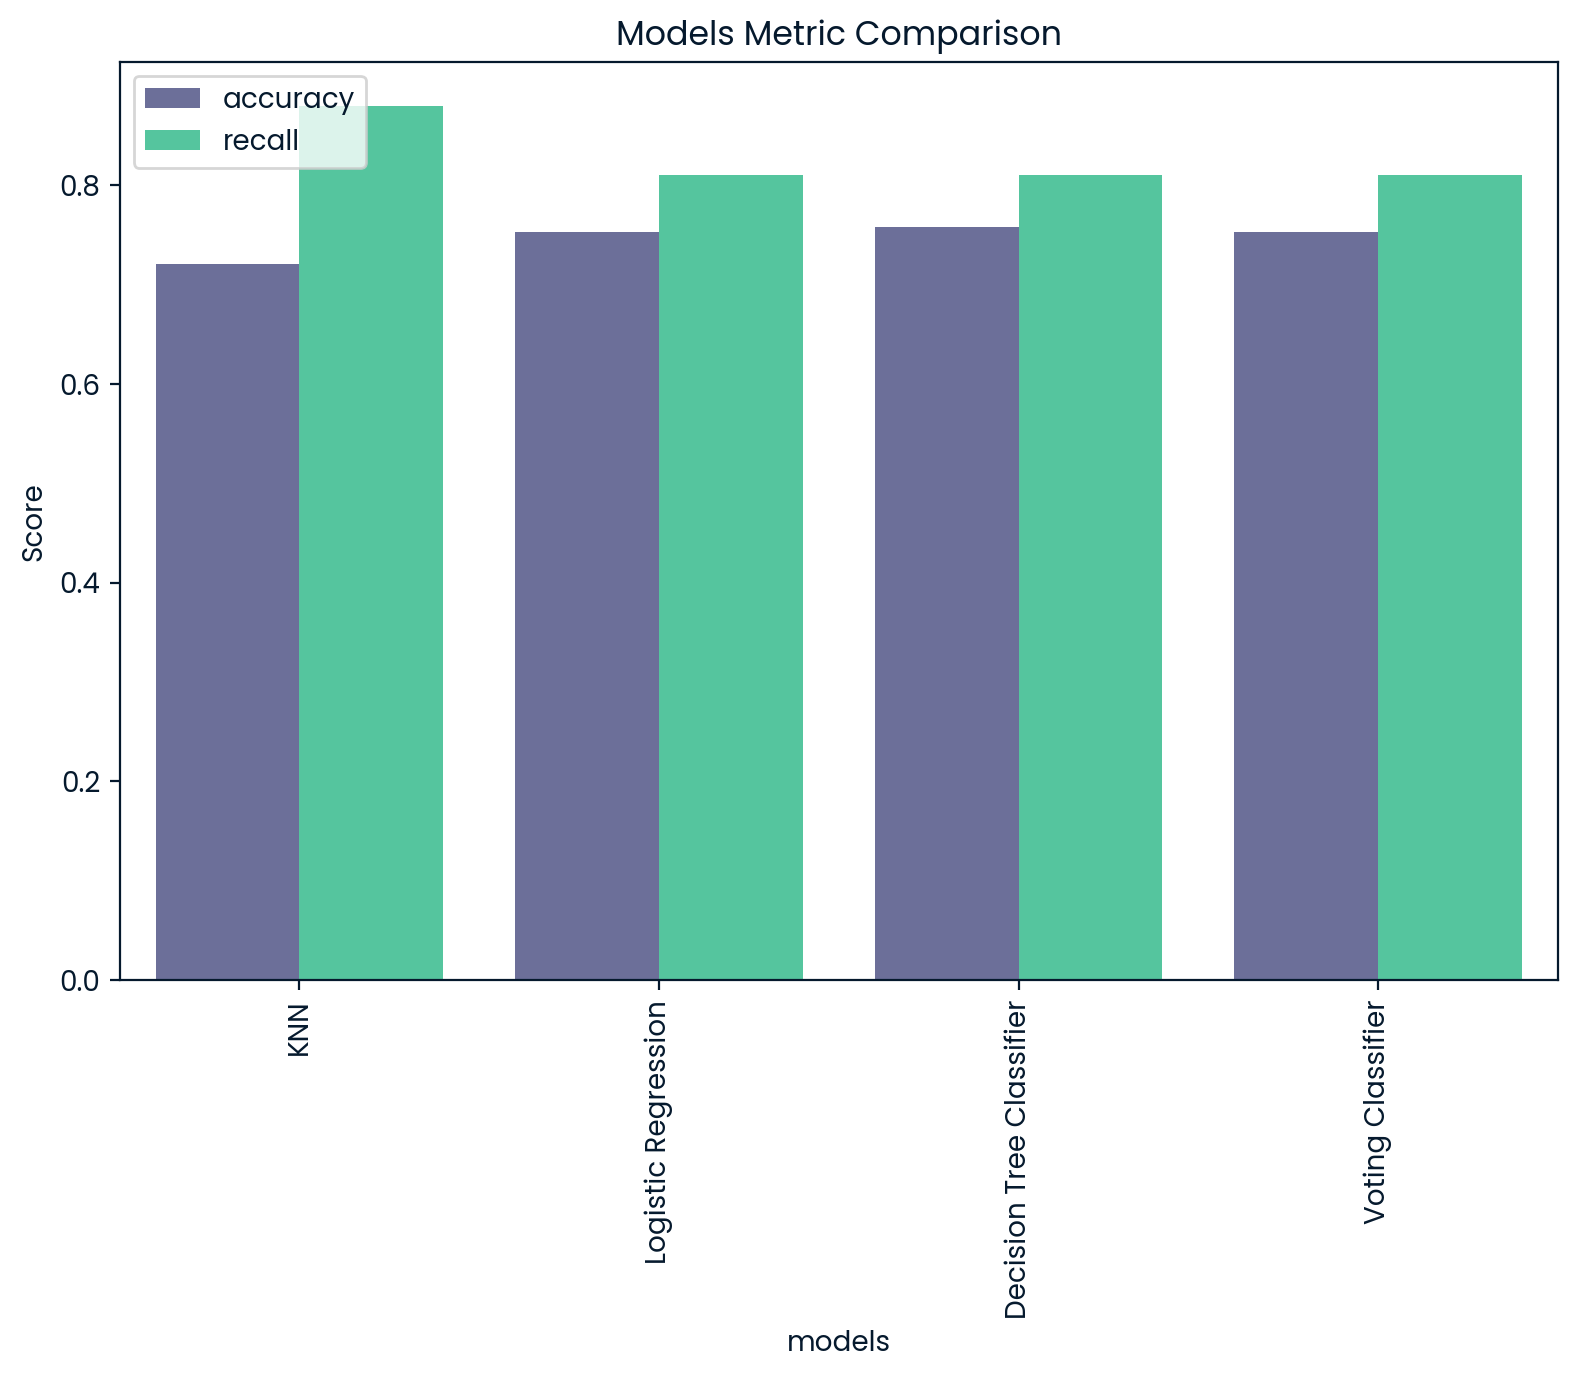

In [174]:
# compile the result
model_result ={
                'models':['KNN','Logistic Regression','Decision Tree Classifier','Voting Classifier'],
                'accuracy':[0.7210,0.7526,0.7578,0.7526],
                'recall':[0.88,0.81,0.81,0.81]
}

# create data frame
model_result_df = pd.DataFrame(model_result)

# melt the data
model_df = model_result_df.melt(id_vars='models',var_name='Metric',value_name='Score')

plt.figure(figsize=(8,7))
sns.barplot(data=model_df,x='models',y='Score',hue='Metric')
plt.title('Models Metric Comparison')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Learning curve and generalization gap

### KNeighbors Learning curve and generalization gap

In KNeighbor we notice it has low validation score meaning it does poorly on unseen data but trainig score is high which indicate model being high variance, so we reduce the features that would be noise and finallized the KNN model that has optimal n_neighbors and noise features removed. The below learning curve represent that finalized model. 

The validation score is low and generalization error is high so decided to move onto the 2nd most highest accuracy model- Logistic Regression.

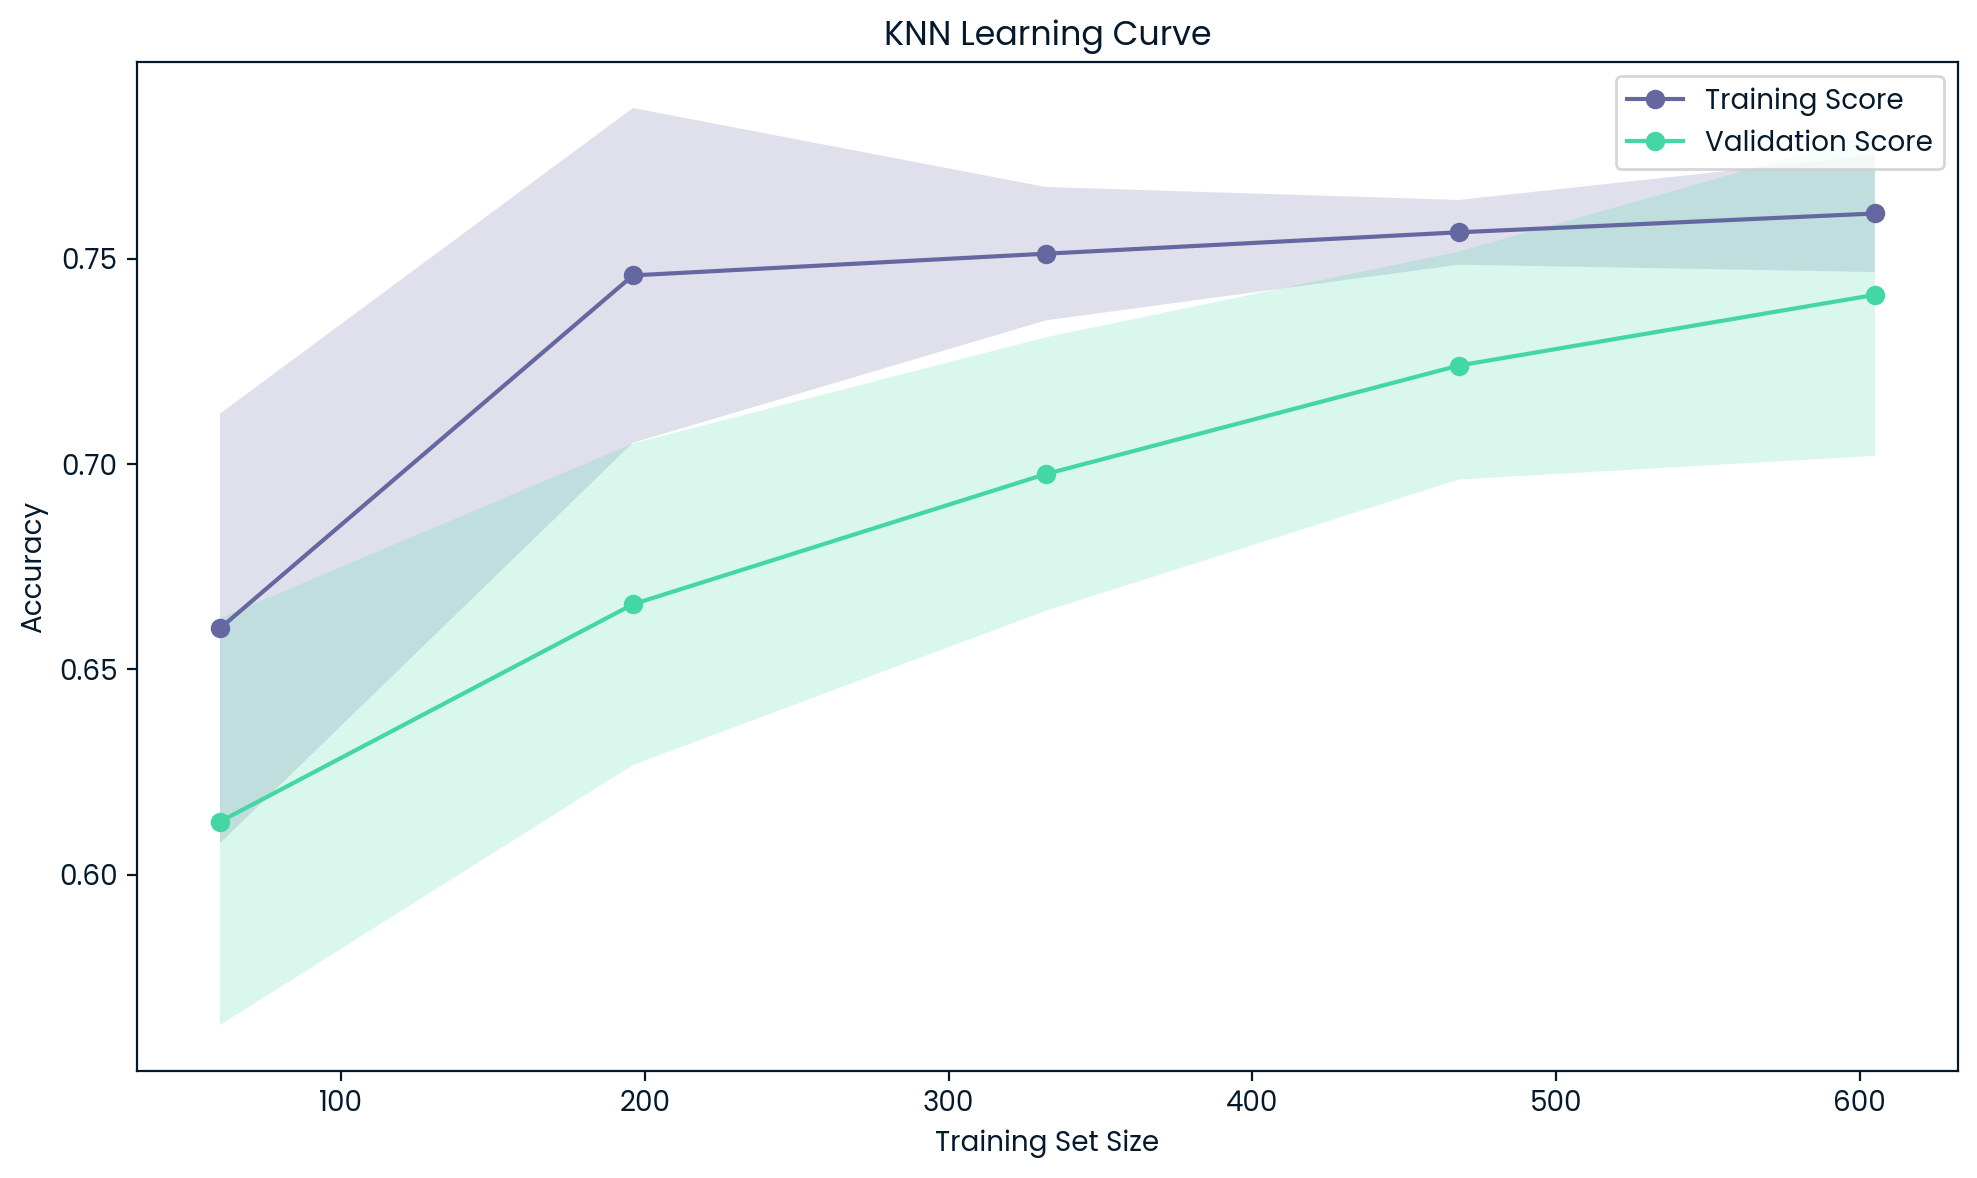

CV train accuracy mean:0.7398658069013594
Train accuracy 0.76221928665786
Test accuracy 0.7210526315789474
Generalization gap= 0.041166655078912595


In [175]:
## Plot the learning curve

train_sizes,train_score,val_score = learning_curve(estimator=knn_top_model.best_estimator_,X=X_train,y=y_train, cv=5, scoring='accuracy',train_sizes=(np.linspace(0.1,1.0,5)),shuffle=True,random_state=42)

# calculate the train,validation_score mean and std dev
train_mean=np.mean(train_score,axis=1)
train_std= np.std(train_score,axis=1)

val_mean=np.mean(val_score,axis=1)
val_std=np.std(val_score,axis=1)

# plot the learning curve visulization
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std,alpha=0.2)

plt.plot(train_sizes, val_mean,label='Validation Score',marker='o')
plt.fill_between(train_sizes,val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.title('KNN Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Finding the generalization error
knn_best_feat = knn_top_model.best_estimator_

# evaluate the cross validated performance on training data
cv_scores = cross_val_score(knn_best_feat, X_train,y_train,cv=5, scoring='accuracy')

# train accuracy
train_accuracy = knn_best_feat.score(X_train,y_train)

# test accuracy
test_accuracy = knn_best_feat.score(X_test,y_test)

# print the results
print(f'CV train accuracy mean:{np.mean(cv_scores)}')
print(f'Train accuracy {train_accuracy}')
print(f'Test accuracy {test_accuracy}')
print(f'Generalization gap= {train_accuracy-test_accuracy}')

### Logistic Regression learning cruve and generalization gap

It works exceptionally well on the unseen data and has low generalization gap, although to reach the 80% accuracy target we would need more substantial labeled data which would take more resources (time and capital) as it starts to show slow growth as the training size goes up.

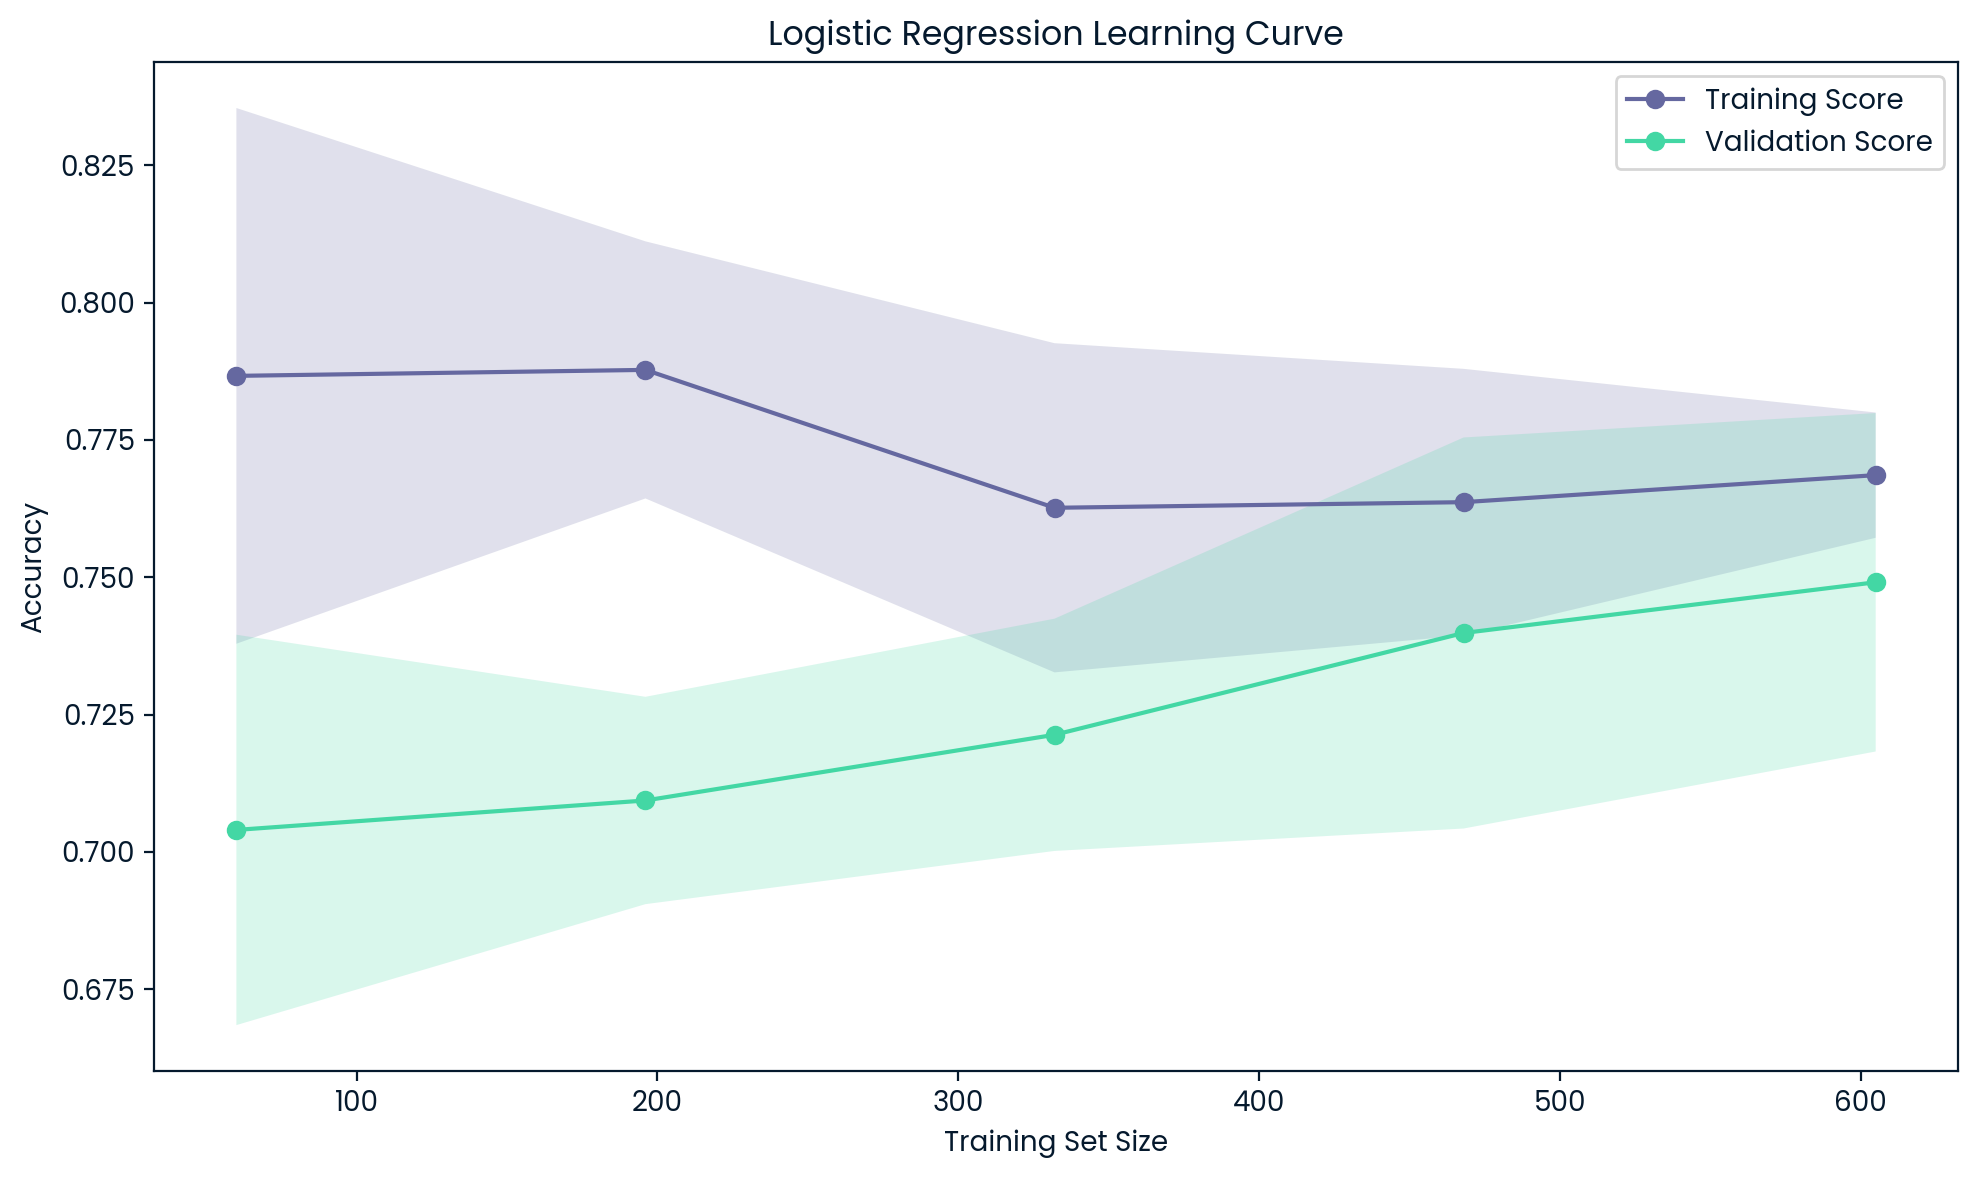

CV train accuracy mean:0.7490937608922968
Train accuracy 0.76221928665786
Test accuracy 0.7526315789473684
Generalization gap= 0.009587707710491555


In [176]:
## Plot the learning curve

train_sizes,train_score,val_score = learning_curve(estimator=lrg_model,X=X_train,y=y_train, cv=5, scoring='accuracy',train_sizes=(np.linspace(0.1,1.0,5)),shuffle=True,random_state=42)

# calculate the train,validation_score mean and std dev
train_mean=np.mean(train_score,axis=1)
train_std= np.std(train_score,axis=1)

val_mean=np.mean(val_score,axis=1)
val_std=np.std(val_score,axis=1)

# plot the learning curve visulization
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std,alpha=0.2)

plt.plot(train_sizes, val_mean,label='Validation Score',marker='o')
plt.fill_between(train_sizes,val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


## Perform the generalization error

# evaluate the cross validated performance on training data
cv_scores = cross_val_score(lrg_model, X_train,y_train,cv=5, scoring='accuracy')

# train accuracy
train_accuracy = lrg_model.score(X_train,y_train)

# test accuracy
test_accuracy = lrg_model.score(X_test,y_test)

# print the results
print(f'CV train accuracy mean:{np.mean(cv_scores)}')
print(f'Train accuracy {train_accuracy}')
print(f'Test accuracy {test_accuracy}')
print(f'Generalization gap= {train_accuracy-test_accuracy}')

## Result

I have tried the based model to much more complex mode of Voting Classifiers that are all tuned to get the desired output of 80% accuracy, however with the feature selection, hyper parameter tuning or moving to more complex model, I am not able to land the desired accuracy. 
This is highy due to the sufficient data volumne not fed to the model as there are only records of over 900, this is evident by accuracy score of the KNN model that impute the missing records and dropping the missing records(5%). Initially, I tried the KNN model that has dropped rows which has lesser accuracy nearly by 2% compared to the imputed data fed to the model.

Also, instead of trying to reach the accuracy, we also have to take recall into consideration which measure the correct prediction of 'High' out of the 'High' class, as missing to show high traffic recipe would lead to opportunity loss for the company.

E.g 
- cost of not showing high traffic recipe (lost revenu) - $ 100 (estimate)
- cost of showing unpopular traffic recipe (website slot ) - $20 (estimate)
    
So, minizing the unpopular recipe shown is also important which is indirectly measure in recall metric.If this metric were to improve, we would have lesser revenue loss which is consider from perspective of revenue loss control.

## Recommendation
To increase the traffic and minimized the display of unpopular with accuracy rate of 80% which is currently unfeasible we recommed to deploy the Logistic Regression model.

1. Test the model in the recent month and compare its prediction to the actual traffic recorded.
2. To further investigate the missing values in the 'high_traffic' column as it is key target we wish to predict.
3. Identify and fix errors to improve accuracy after testing and further collection labeled data and fed to the model.
4. Fully deploy the model using efficient deployment strategy, such as a web or mobile application or API.
5. Continuously improve the model by collecting more data, feature engineer and fine tuning parameter. 


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation